<h2>Project Explore Weather trends</h2>
<ul>
    <li>3 data files (city_data, city_list, global_data)</li>
 </ul>

In [233]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
dfcd = pd.read_csv('data/city_data.csv')
dfcl = pd.read_csv('data/city_list.csv')
dfgd = pd.read_csv('data/global_data.csv')

In [234]:
df_global = dfgd
df_cities = dfcd
df_global['city'] = 'global'
df_global['country'] = 'World'
df_all = pd.concat([df_global, df_cities], sort=True)

In [235]:
df_all = df_all[df_all['city'].isin(['global', 'Hamburg', 'New York', 'Oslo', 'Sydney']) & ((df_all['year']>=1850) & (df_all['year'] <=2010))]
df_all.dropna(how='all')
df_all.isna().sum()
df_all.shape

(805, 4)

In [236]:
df_all.set_index(['city', 'year'], inplace=True)

In [237]:
x = df_all.index.levels[1]

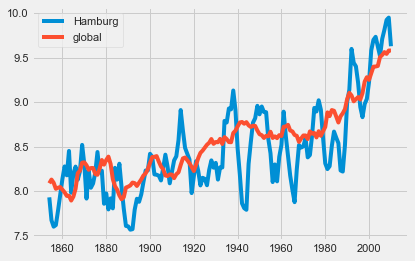

In [239]:
fig, ax_lst = plt.subplots(1,1)
for city in ['Hamburg', 'global']:
    ax_lst.plot(x, df_all.loc[city,'avg_temp'].rolling(5).mean(), label=city)
ax_lst.legend()

